# Visualizing Scikit-Learn Contributions on Github over Time

## Implementation
 - There two types of nodes - commit and contributor nodes.    
 - Contributors have edges to one or more commit vertices, where the time weight is the delta from the contributor's last commit.     
 - Commits have an edge to their parent, whose time weight is the delta between their commit timestamps.    

In [1]:
import os
import csv
import datetime
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
%matplotlib inline

In [3]:
INPATH     = 'sklearncommits_mini.txt' # full set was slow so clipped last 2yrs
IMGPATH    = 'sklearngraph.png'
GRAPHML    = 'sklearngraph.graphml'
DATEFORMAT = ' %a %b %d %H:%M:%S %Y %z'

In [4]:
g = nx.Graph(name="Sklearn Commits")

In [5]:
ifile   = open(os.path.join('data', INPATH), 'r')
commits  = csv.reader(ifile)

In [6]:
for commit in commits:
    commit_hash = commit[0]     # Uniquely identifies a commit
    parent_hashes = commit[1]
    contributor = commit[2]
    try: 
        commit_timestamp = datetime.datetime.strptime(commit[3], DATEFORMAT).date()
    except:
        pass
    
    g.add_node(commit_hash, timestamp=commit_timestamp)  # add other elements?
    g.add_node(contributor)
    g.add_edge(contributor, commit_hash, label='contributor')

    for parent in parent_hashes:
        g.add_node(parent, timestamp=commit_timestamp)
        delta = g.node[parent]['timestamp']-g.node[commit_hash]['timestamp']
        g.add_edge(parent, commit_hash, label='parent', weight=delta.total_seconds())

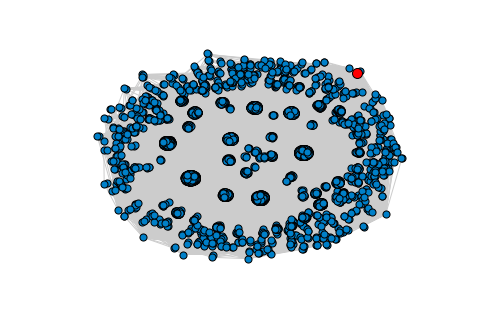

In [7]:
center, degree = sorted(g.degree().items(), key=itemgetter(1), reverse=True)[0]
# A special type of subgraph
ego = nx.ego_graph(g, center)

pos = nx.spring_layout(g)
nx.draw(g, pos, node_color='#0080C9', edge_color='#cccccc', node_size=50)
nx.draw_networkx_nodes(g, pos, nodelist=[center], node_size=100, node_color="r")
plt.show()


In [8]:
for component in nx.connected_components(g):
    print(len(component))

4453


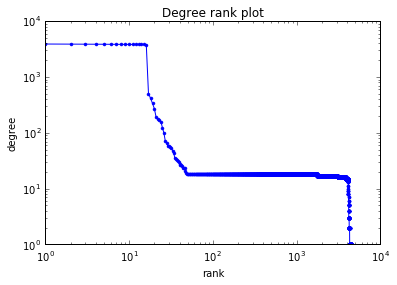

In [9]:
degree_sequence=sorted(nx.degree(g).values(),reverse=True) # degree sequence

plt.loglog(degree_sequence,'b-',marker='.')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [10]:
print("Order: %i" % g.number_of_nodes())
print("Size: %i" % g.number_of_edges())
print("Clustering: %0.5f" % nx.average_clustering(g))
print("Transitivity: %0.5f" % nx.transitivity(g))

Order: 4453
Size: 69982
Clustering: 0.00000
Transitivity: 0.00000


In [11]:
hairball = nx.subgraph(g, [x for x in nx.connected_components(g)][0])
print("Average shortest path: %0.4f" % nx.average_shortest_path_length(hairball))

Average shortest path: 2.1446


In [12]:
print(nx.density(g))

0.007060061672385778


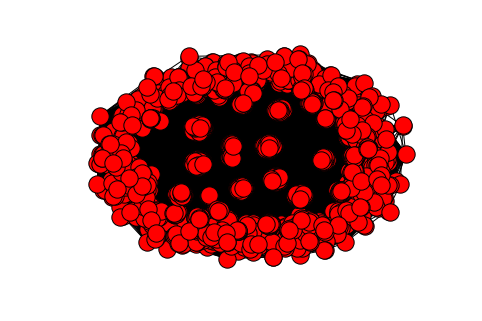

In [13]:
nx.draw(g)

In [14]:
# plt.savefig(os.path.join('images', IMGPATH))

In [15]:
nx.write_graphml(g,GRAPHML)

NetworkXError: GraphML writer does not support <class 'datetime.date'> as data values.